## K Nearest Neighbors

In this section, we will explore the [KNN classification algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).
A classification algorithm takes input some data and use the data to 
determine which class (category) this piece of data belongs to.

![flower](https://archive.ics.uci.edu/ml/assets/MLimages/Large53.jpg)

As a motivating example, consider the [iris flower dataset](https://archive.ics.uci.edu/ml/datasets/iris). The dataset consists
of 150 data points where each data point is a feature vector $\boldsymbol x \in \mathbb{R}^4$ describing the attribute of a flower in the dataset, the four dimensions represent 

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 


and the corresponding target $y \in \mathbb{Z}$ describes the class of the flower. It uses the integers $0$, $1$ and $2$ to represent the 3 classes of flowers in this dataset.

0. Iris Setosa
1. Iris Versicolour 
2. Iris Virginica


In [20]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np


In [8]:
iris = load_iris()
print('data shape is {}'.format(iris.data.shape))
print('class shape is {}'.format(iris.target.shape))

data shape is (150, 4)
class shape is (150,)


For the simplicity of the exercise, we will only use the first 2 dimensions (sepal length and sepal width) of as features used to classify the flowers.


In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [16]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [114]:
# use first two featurs only for simplicity
X = iris.data[:, :2] 
y = iris.target

We create a scatter plot of the dataset below. The x and y axis represent the sepal length and sepal width of the dataset, and the color of the points represent the different classes of flowers.

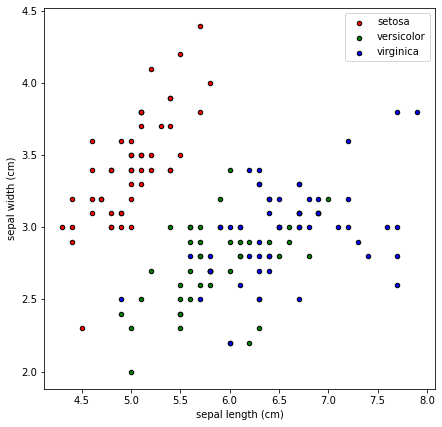

In [120]:
cmap_light = ListedColormap(['r', 'g', 'b'])
cmap_bold = ListedColormap(['r', 'g', 'b'])

fig, ax = plt.subplots(figsize=(7, 7))

for i, iris_class in enumerate(iris['target_names']):
    idx = (y==i)
    ax.scatter(X[idx, 0], X[idx, 1], 
               c=cmap_bold.colors[i], edgecolor='k', s=20, label=iris_class);
    
ax.set(xlabel=iris['feature_names'][0], ylabel=iris['feature_names'][1])
ax.legend();

The idea behind a KNN classifier is pretty simple: Given a training set $\boldsymbol X \in \mathbb{R}^{N \times D}$ and $\boldsymbol y \in \mathbb{Z}^N$, we predict the label of a new point $\boldsymbol x \in \mathbb{R}^{D}$ __as the label of the majority of its "K nearest neighbor"__ (hence the name KNN) by some distance measure (e.g the Euclidean distance).
Here, $N$ is the number of data points in the dataset, and $D$ is the dimensionality of the data.

In [121]:
def pairwise_distance_matrix(X, Y):
    """Compute the pairwise distance between rows of X and rows of Y

    Arguments
    ----------
    X: ndarray of size (N, D)
    Y: ndarray of size (M, D)
    
    Returns
    --------
    distance_matrix: matrix of shape (N, M), each entry distance_matrix[i,j] is the distance between
    ith row of X and the jth row of Y (we use the dot product to compute the distance).
    """
    N, D = X.shape
    M, _ = Y.shape
    
    distance_vectors = (X[..., None] - Y.T[None, ...])
    distance_matrix = np.linalg.norm(distance_vectors, axis=1)
    
    return distance_matrix


In [122]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) 

a[..., None], a[..., None].shape

(array([[[1],
         [2],
         [3]],
 
        [[4],
         [5],
         [6]]]),
 (2, 3, 1))

In [123]:
b.T[None, ...], b.T[None, ...].shape

(array([[[1, 4, 7],
         [2, 5, 8],
         [3, 6, 9]]]),
 (1, 3, 3))

In [124]:
a[..., None] - b.T[None, ...]

array([[[ 0, -3, -6],
        [ 0, -3, -6],
        [ 0, -3, -6]],

       [[ 3,  0, -3],
        [ 3,  0, -3],
        [ 3,  0, -3]]])

In [125]:
def KNN(k, X, y, x):
    """K nearest neighbors
    k: number of nearest neighbors
    X: training input locations
    y: training labels
    x: test input
    """
    N, D = X.shape
    num_classes = len(np.unique(y))    
    
    # This code block is only used because the autograder sometimes passes 1D arrays as x
    if len(x.shape) == 1:
        x_ = x.reshape(1, -1)
    else:
        x_ = x
    
    # We have to use .ravel() to collapse the resulting 2D matrix to 1D
    dist = pairwise_distance_matrix(X, x_).ravel()
    
    classes = y[np.argsort(dist)][:k]     # find the labels of the k nearest neighbors
    
    # Next we make the predictions
    ypred = np.zeros(num_classes)
    for c in np.unique(classes):
        ypred[c] = (classes == c).sum()
    
    return np.argmax(ypred)              


We can also visualize the "decision boundary" of the KNN classifier, which is the region of a problem space in which the output label of a classifier is ambiguous. This would help us develop an intuition of how KNN behaves in practice. The code below plots the decision boundary.

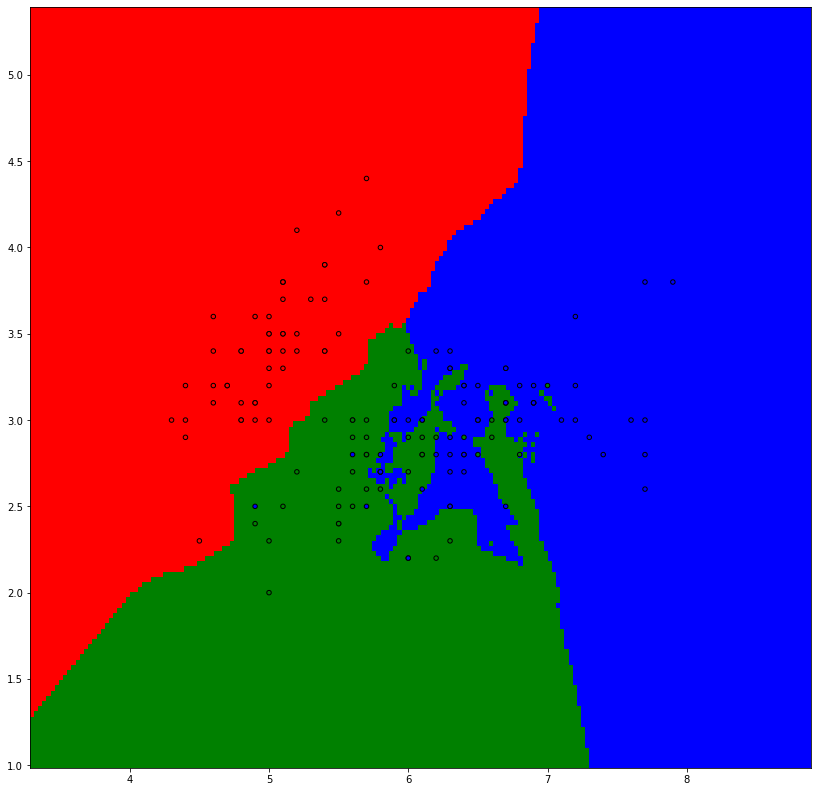

In [131]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

step = 0.03
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

ypred = []
K = 3

for data in np.array([xx.ravel(), yy.ravel()]).T:
    ypred.append(KNN(K, X, y, data.reshape(1, 2)))

fig, ax = plt.subplots(figsize=(14, 14))

ax.pcolormesh(xx, yy, np.array(ypred).reshape(xx.shape), cmap=cmap_light, shading='auto')

ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)

plt.show()